In [93]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.optimize as opt

EJERCICIO 3

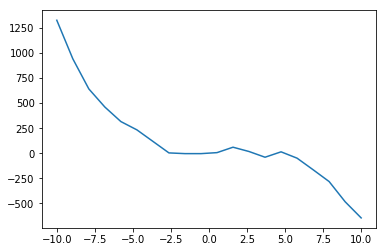

In [96]:
#Ejercicio 3
# 3.1
true_val=[-1,3,2,10]
pol=np.poly1d([-1,3,2,10]) # o pol=np.poly1d(*true_val)
# 3.2
x=np.linspace(-10,10,20)
y=pol(x)
noise=25*np.random.randn(x.size)
y=y+noise
# Hacemos plot de los datos
pl.plot(x,y)

In [97]:
#3.3
a=np.polyfit(x,y,3)
Fit=np.poly1d(a) # esto es una manera compacta de poner la función 
                #def pol3(x,*a):      
                #    return a[0]*x^3+a[1]*x^2+a[2]*x+a[3]   
print ('pol parametres =',a)
print ('true val=',true_val)

('pol parametres =', array([-1.00161292,  3.06645054,  1.49570927, 10.19981983]))
('true val=', [-1, 3, 2, 10])


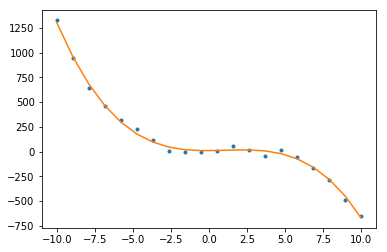

In [99]:
pl.plot(x,y,'.')
pl.plot(x,Fit(x))

In [102]:
# 3.4 
print 'Media error cuadrático (o residuos)',np.mean((y-Fit(x))**2) 

Media error cuadrático (o residuos) 835.7583653718493


*********************************
EJERCICIO 4
*********************************

In [107]:
# 4.1
def func(x,a,b,f,phi):
     return a*np.exp(-b*np.sin(f*x+phi))

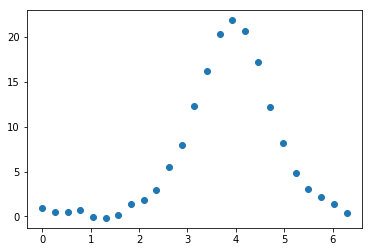

In [109]:
true_params=[3, 2, 1, np.pi/4]
x = np.linspace(0, 2*np.pi, 25)
y = func(x, *true_params)  
noise = 0.3*np.random.randn(x.size)
y=y+noise
pl.plot(x,y,'o')

[3.0549134  1.96762916 1.00185066 0.77047183]


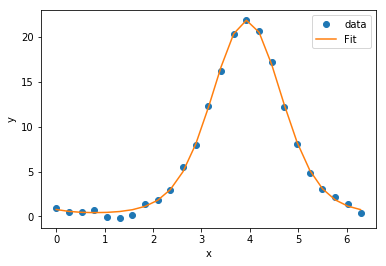

In [114]:
popt,pcov=opt.curve_fit(func,x,y)
print popt  # EN POPT HAY LOS PARAMTROS DEL MODELO: a, b, f y phi estimados
pl.plot(x,y,'o',label='data')
pl.plot(x,func(x,*popt),label='Fit')
pl.xlabel('x')
pl.ylabel('y')
pl.legend()

*********************************
EJERCICIO 5
*********************************

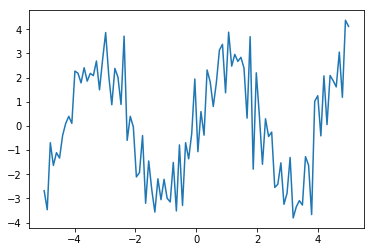

In [86]:
# Ejercicio 5
def func(x, a, b):
    return a * np.sin(b * x)
#x=np.linspace(-5,5,100)
#y=test_func(x,2.9,1.5)+np.random.randn(len(x))
#c=np.transpose([x,y])
#np.savetxt('dataSin.txt',c)
#pl.plot(x,y)
import numpy as np
data=np.loadtxt('dataSin.txt')
x=data[:,0]
y=data[:,1]
true_val=[2.9,1.5]
pl.plot(x,y)


101.9178848698917


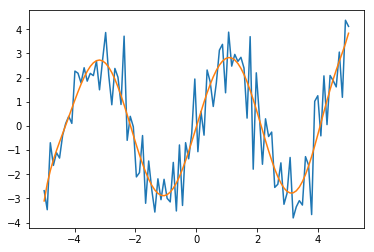

In [68]:
res=np.polyfit(x,y,9)
Fit=np.poly1d(res)
pl.plot(x,y)
pl.plot(x,Fit(x))
mse=np.sum((Fit(x)-y)**2)
print mse

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be po

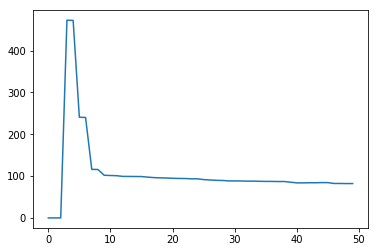

In [73]:
# podemos probar a mano e ir mirando plot o calcular residuos
mse=np.zeros(50);grad=np.zeros(50)
for i in xrange(3,50):
    res=np.polyfit(x,y,i)
    Fit=np.poly1d(res)
    mse[i]=np.sum((Fit(x)-y)**2)
    grad[i]=i
pl.plot(mse)

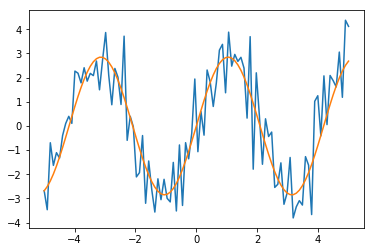

In [74]:
# parece que a 9 o 10 ya ha convergido
res=np.polyfit(x,y,9)
Fit=np.poly1d(res)
# ahora curve_fit con la función de verdad
popt,pcov=opt.curve_fit(test_func,x,y)
pl.plot(x,y)
pl.plot(x,test_func(x,*popt))


112.63486499587005


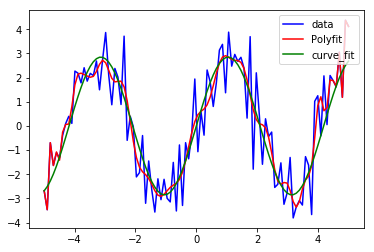

In [76]:

pl.plot(x, y, 'b-', label='data')
pl.plot(x,Fit(x),'r',label='Polyfit')
pl.plot(x, func(x,*popt), 'g',label='curve_fit')
pl.legend()
mse=np.sum((func(x,*popt)-y)**2)
print mse